# MNIST DATASET

In [1]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.6 MB/s eta 0:00:00
time: 929 µs (started: 2024-07-01 01:45:33 +00:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

SEED=42

time: 7.97 s (started: 2024-07-01 01:45:33 +00:00)


In [3]:
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

--2024-07-01 01:45:41--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11490434 (11M) [application/octet-stream]
Saving to: ‘mnist.npz’

mnist.npz           100%[===================>]  10.96M  6.75MB/s    in 1.6s    

2024-07-01 01:45:43 (6.75 MB/s) - ‘mnist.npz’ saved [11490434/11490434]

time: 1.92 s (started: 2024-07-01 01:45:41 +00:00)


In [27]:
df = np.load('mnist.npz')
df

NpzFile 'mnist.npz' with keys: x_test, x_train, y_train, y_test

time: 3.07 ms (started: 2024-07-01 01:51:45 +00:00)


In [28]:
# dictionary type :

x_train = df['x_train']
y_train = df['y_train']
x_test = df['x_test']
y_test = df['y_test']

time: 243 ms (started: 2024-07-01 01:51:46 +00:00)


In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

time: 4.91 ms (started: 2024-07-01 01:51:47 +00:00)


In [30]:
np.random.seed(SEED)
sample = np.random.randint(60000,size=25)
sample

array([56422, 15795,   860, 38158, 54343, 44732, 11284, 54886,  6265,
       16850, 37194, 21962, 47191, 44131, 16023, 41090,  1685,   769,
       59735, 56101,  2433,  5311, 37819, 39188, 17568])

time: 3.36 ms (started: 2024-07-01 01:51:47 +00:00)


In [31]:
# plt.figure(figsize=(8, 8))
# for i, idx in enumerate(sample):
#     plt.subplot(5, 5, i + 1)
#     plt.imshow(x_train[idx], cmap='gray')
#     plt.title(y_train[idx])
#     plt.axis('off')

time: 265 µs (started: 2024-07-01 01:51:47 +00:00)


<Axes: >

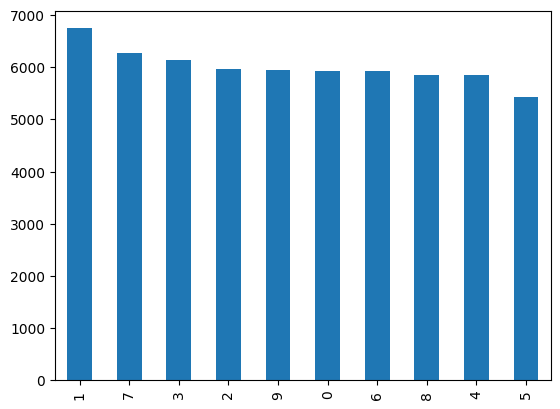

time: 222 ms (started: 2024-07-01 01:51:48 +00:00)


In [32]:
pd.Series(y_train).value_counts().plot(kind='bar')

## 데이터 분리

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=SEED)

time: 25.8 ms (started: 2024-07-01 01:51:49 +00:00)


In [34]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((42000, 28, 28), (18000, 28, 28), (42000,), (18000,))

time: 2.89 ms (started: 2024-07-01 01:51:49 +00:00)


## 전처리
- x : scaling
- y : onehot Encoding

In [35]:
X_train = X_train/255.0
X_val = X_val/255.0

time: 119 ms (started: 2024-07-01 01:51:49 +00:00)


In [36]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
y_train_o = enc.fit_transform(y_train.reshape(-1,1))
y_val_o = enc.transform(y_val.reshape(-1,1))

time: 9.39 ms (started: 2024-07-01 01:51:50 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
y_train_o[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

time: 3.88 ms (started: 2024-07-01 01:51:50 +00:00)


In [38]:
X_train_flat = X_train.reshape(-1,28*28)
X_val_flat = X_val.reshape(-1, 28*28)

X_train_flat.shape, X_val_flat.shape

((42000, 784), (18000, 784))

time: 4.36 ms (started: 2024-07-01 01:51:50 +00:00)


In [39]:
y_train.shape

(42000,)

time: 2.95 ms (started: 2024-07-01 01:51:51 +00:00)


In [40]:
X_train_flat.shape,y_train_o.shape

"""
출력
X_train_flat.shape,y_train_o.shape
((12000, 784), (12000, 10))
"""

'\n출력 \nX_train_flat.shape,y_train_o.shape\n((12000, 784), (12000, 10))\n'

time: 3.3 ms (started: 2024-07-01 01:51:51 +00:00)


## 모델

In [41]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units = 64,activation='relu',input_shape=(784,)),
    layers.Dense(units = 32,activation='relu'),
    layers.Dense(units = 16,activation='relu'),
    layers.Dense(units = 10,activation='softmax'),
])

time: 51.8 ms (started: 2024-07-01 01:51:51 +00:00)


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 27.3 ms (started: 2024-07-01 01:51:51 +00:00)


In [43]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

time: 10.1 ms (started: 2024-07-01 01:51:52 +00:00)


In [44]:
history = model.fit(X_train_flat,
          y_train_o,
          epochs=10,
          validation_data=(X_val_flat,y_val_o),
          batch_size=32,
          verbose=1,
          )

Epoch 1/10
1313/1313 [==============================] - 7s 4ms/step - loss: 0.4105 - accuracy: 0.8805 - val_loss: 0.1926 - val_accuracy: 0.9443
Epoch 2/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1671 - accuracy: 0.9502 - val_loss: 0.1542 - val_accuracy: 0.9554
Epoch 3/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1235 - accuracy: 0.9635 - val_loss: 0.1374 - val_accuracy: 0.9592
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0990 - accuracy: 0.9704 - val_loss: 0.1392 - val_accuracy: 0.9591
Epoch 5/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0816 - accuracy: 0.9750 - val_loss: 0.1280 - val_accuracy: 0.9617
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0658 - accuracy: 0.9795 - val_loss: 0.1365 - val_accuracy: 0.9614
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0579 - accuracy: 0.9818 - val_loss: 0.1251 - val_accuracy:

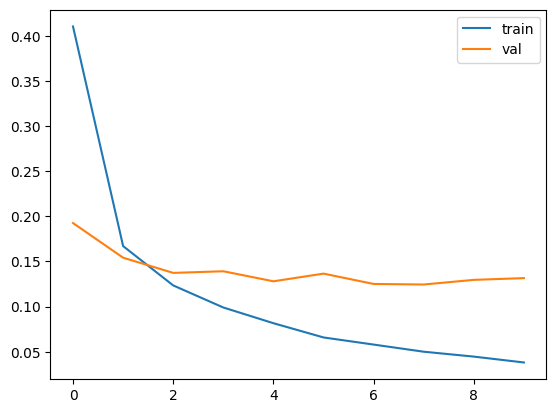

time: 848 ms (started: 2024-07-01 01:53:00 +00:00)


In [45]:
def plot_history(history):
    hist = history.history
    epochs = history.epoch

    plt.plot(epochs,hist['loss'],label='train')
    plt.plot(epochs,hist['val_loss'],label='val')
    plt.legend()

plot_history(history)

## 테스트

In [46]:
x_test.shape

(10000, 28, 28)

time: 3.03 ms (started: 2024-07-01 01:53:17 +00:00)


In [47]:
X_test = x_test/255.0 # Min Max scale
X_test_flat = x_test.reshape(-1,28*28) # flatten
y_test_o = enc.transform(y_test.reshape(-1,1)) # one hot encoding

time: 23.4 ms (started: 2024-07-01 01:53:19 +00:00)


In [49]:
X_test_flat.shape, y_test_o.shape

((10000, 784), (10000, 10))

time: 9.21 ms (started: 2024-07-01 01:53:40 +00:00)


In [50]:
y_pred = model.predict(X_test_flat)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

time: 1.04 s (started: 2024-07-01 01:53:48 +00:00)


In [53]:
# 정확도 출력
y_pred_val = np.argmax(y_pred,axis=1)
y_test_val = np.argmax(y_test_o,axis=1)

time: 2.59 ms (started: 2024-07-01 01:55:51 +00:00)


accuracy: 0.9664
recall: 0.9660143881787457
precision: 0.9664490443286328
f1 : 0.9661247468913782


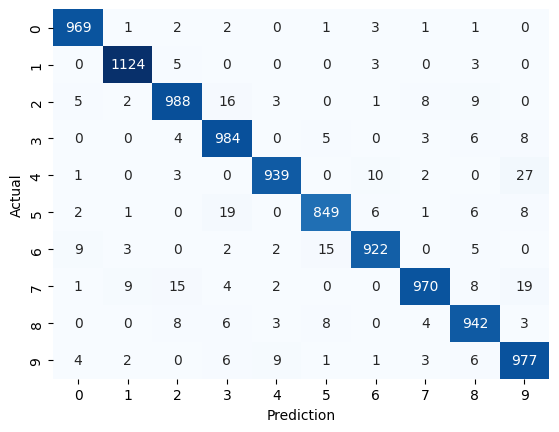

time: 898 ms (started: 2024-07-01 01:56:47 +00:00)


In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

print_metrics(y_test_val, y_pred_val, aver='macro')

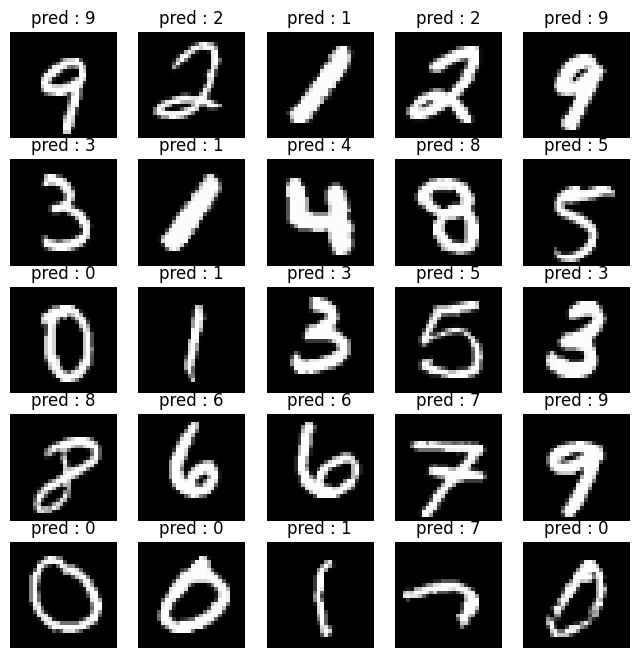

time: 2.72 s (started: 2024-07-01 02:00:24 +00:00)


In [60]:
plt.figure(figsize=(8, 8))
sample = np.random.randint(10000,size=25)
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"pred : {y_test[idx]}")
    plt.axis('off')